# Context

we have single datasets for each type of "factor" that people might take in consideration when deciding what country to live in, but we need to merge all of them into one single dataset in order to build models with this data

# Basic cleaning and Exploration

we have 5 datasets in total:
- cost of living
- healthcare index
- safety index
- internet speed
- average temperatures

In [1]:
import pandas as pd

cost_of_living = pd.read_csv("../raw_data/Alternative_sources_country_level/cost_expense.csv")
healthcare = pd.read_csv("../raw_data/Alternative_sources_country_level/healthcare_index.csv")
climate = pd.read_csv("../raw_data/Alternative_sources_country_level/climate_avarage_temperature.csv")
internet = pd.read_csv("../raw_data/Alternative_sources_country_level/internet_speed_rankings.csv")
safety = pd.read_csv("../raw_data/Alternative_sources_country_level/safety_index_data.csv")

In [2]:
#select only the columns we need for now, rename them with explanative names and set the index to country for all datasets

#cost of living
cost_of_living = cost_of_living[['country', 'average_monthly_cost($)']]
cost_of_living.columns = ['Country', 'average_monthly_cost_$']
cost_of_living.set_index('Country', inplace=True)

# healthcare dataset
healthcare = healthcare[['Country', 'Health Care Index']]
healthcare.columns = ['Country', 'Healthcare Index']
healthcare.set_index('Country', inplace=True)

# climate dataset
climate = climate[['Country', 'Temperature']]
climate.columns = ['Country', 'average_yearly_temperature']
climate.set_index('Country', inplace=True)

# internet dataset
internet = internet[['Country', 'Internet Speed (Mbps)']]
internet.columns = ['Country', 'internet_speed_mbps']
internet.set_index('Country', inplace=True)

# safety dataset
safety = safety[['Country', 'Safety Index']]
safety.columns = ['Country', 'safety_index']
safety.set_index('Country', inplace=True)


In [3]:
#Now let's understand how the Country indexes are misaligned between the datasets


# 1. Assess misalignment between datasets

# Get all unique country names from each dataset
countries_cost = set(cost_of_living.index)
countries_climate = set(climate.index)
countries_internet = set(internet.index)
countries_safety = set(safety.index)
countries_healthcare = set(healthcare.index)

# Count total unique countries across all datasets
all_countries = countries_cost.union(countries_climate, countries_internet, countries_safety, countries_healthcare)
print(f"Total unique countries across all datasets: {len(all_countries)}")

# Check how many countries are common across all datasets
common_countries = countries_cost.intersection(countries_climate, countries_internet, countries_safety, countries_healthcare)
print(f"Countries common to all datasets: {len(common_countries)}")
print(f"Countries that would be lost in a direct merge: {len(all_countries) - len(common_countries)}")

# Check dataset-specific coverage
print(f"\nDataset coverage:")
print(f"Cost of living dataset: {len(countries_cost)} countries")
print(f"Climate dataset: {len(countries_climate)} countries")
print(f"Internet dataset: {len(countries_internet)} countries")
print(f"Safety dataset: {len(countries_safety)} countries")
print(f"Healthcare dataset: {len(countries_healthcare)} countries")

Total unique countries across all datasets: 255
Countries common to all datasets: 116
Countries that would be lost in a direct merge: 139

Dataset coverage:
Cost of living dataset: 172 countries
Climate dataset: 178 countries
Internet dataset: 155 countries
Safety dataset: 147 countries
Healthcare dataset: 236 countries


# Standardizing country names

In [4]:
# 2. Standardize country names

# Create a function to standardize country names
def standardize_country_name(name):
    # Convert to lowercase for comparison
    name = name.lower()
    
    # Replacements to be made manually
    easy_replacements = {
        'democratic republic of the congo': 'congo',
        'republic of the congo': 'congo',
        "côte d'ivoire": 'ivory coast',
        'dr congo': 'congo',
        'hong kong (sar)': 'hong kong',
        'macau (sar)': 'macau',
        'trinidad and tobago': 'trinidad & tobago',
        'bosnia and herzegovina': 'bosnia & herzegovina',
        'ivory coast': 'ivory coast',
        'myanmar (burma)': 'myanmar',
        'macau (china)': 'macau',
        'hong kong (china)': 'hong kong',
        'tanzania, united republic of': 'tanzania',
        'united kingdom of great britain & northern ireland': 'united kingdom',
        'swaziland': 'eswatini',
        'türkiye': 'turkey',
        'sint maarten': 'saint martin',
        'kosovo (disputed territory)': 'kosovo',
        'us virgin islands': 'united states virgin islands',
        'cape verde': 'cabo verde',
        'puerto rico': 'puerto rico',
        'macao (china)': 'macau',
        'trinidad and tobago': 'trinidad & tobago',
        'bosnia and herzegovina': 'bosnia & herzegovina',
        'antigua and barbuda': 'antigua & barbuda',
        "tanzania, united republic of": "tanzania",
        "czechia": "czech republic",
        "korea, republic of": "south korea",
        "moldova, republic of": "moldova",
        "macedonia, the former yugoslav republic of": "north macedonia",
        "slovakia": "slovakia",
        "myanmar (burma)": "myanmar",
        "united kingdom of great britain and northern ireland": "united kingdom",
        'the bahamas': 'bahamas',
        "united states virgin islands": "virgin islands"
    }
    
    # Apply replacements
    for old, new in easy_replacements.items():
        if name == old:
            return new
    
    return name

# Create standardized versions of each dataset
def standardize_dataset(df):
    # Create a copy to avoid modifying the original
    df_std = df.copy()
    
    # Create a mapping of original to standardized names
    name_mapping = {idx: standardize_country_name(idx) for idx in df.index}
    
    # Create a new index with standardized names
    df_std.index = [name_mapping[idx] for idx in df.index]
    
    return df_std, name_mapping

# Standardize each dataset
cost_of_living_std, cost_mapping = standardize_dataset(cost_of_living)
climate_std, climate_mapping = standardize_dataset(climate)
internet_std, internet_mapping = standardize_dataset(internet)
safety_std, safety_mapping = standardize_dataset(safety)
healthcare_std, healthcare_mapping = standardize_dataset(healthcare)

# Check improvement after standardization
countries_cost_std = set(cost_of_living_std.index)
countries_climate_std = set(climate_std.index)
countries_internet_std = set(internet_std.index)
countries_safety_std = set(safety_std.index)
countries_healthcare_std = set(healthcare_std.index)
common_countries_std = countries_cost_std.intersection(countries_climate_std, countries_internet_std, countries_safety_std, countries_healthcare_std)
print(f"\nAfter standardization:")
print(f"Countries common to all datasets: {len(common_countries_std)}")




After standardization:
Countries common to all datasets: 122


In [5]:
print(sorted(internet_std.index.tolist()))
print(sorted(cost_of_living_std.index.tolist()))
print(sorted(climate_std.index.tolist()))
print(sorted(safety_std.index.tolist()))
print(sorted(healthcare_std.index.tolist()))

['afghanistan', 'albania', 'algeria', 'angola', 'antigua & barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bolivia', 'bosnia & herzegovina', 'botswana', 'brazil', 'brunei', 'bulgaria', 'burkina faso', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'chile', 'china', 'colombia', 'congo', 'costa rica', 'croatia', 'cuba', 'cyprus', 'czech republic', 'denmark', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'estonia', 'ethiopia', 'finland', 'france', 'gabon', 'georgia', 'germany', 'ghana', 'greece', 'guatemala', 'guyana', 'haiti', 'honduras', 'hong kong', 'hungary', 'iceland', 'india', 'indonesia', 'iran', 'iraq', 'ireland', 'israel', 'italy', 'ivory coast', 'jamaica', 'japan', 'jordan', 'kazakhstan', 'kenya', 'kosovo', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'libya', 'liechtenstein', 'luxembourg', 'macau', 'madagascar', 'malaysia', 'maldives'

In [6]:
#let's manually check if some countries are not aligned but present in all lists
print(sorted(set(internet_std.index.tolist()) - common_countries_std))
print(sorted(set(cost_of_living_std.index.tolist()) - common_countries_std))
print(sorted(set(climate_std.index.tolist()) - common_countries_std))
print(sorted(set(safety_std.index.tolist()) - common_countries_std))
print(sorted(set(healthcare_std.index.tolist()) - common_countries_std))


['antigua & barbuda', 'benin', 'burkina faso', 'cabo verde', 'congo', 'dominica', 'el salvador', 'gabon', 'haiti', 'hong kong', 'ivory coast', 'kosovo', 'kyrgyzstan', 'laos', 'liechtenstein', 'macau', 'madagascar', 'mali', 'mauritania', 'moldova', 'myanmar', 'north macedonia', 'palestine', 'russia', 'san marino', 'senegal', 'suriname', 'taiwan', 'tajikistan', 'togo', 'turkey', 'turkmenistan', 'yemen']
['andorra', 'aruba', 'bermuda', 'bhutan', 'cabo verde', 'congo', 'curacao', 'dominica', 'eswatini', 'fiji', 'french polynesia', 'gabon', 'gambia', 'gibraltar', 'guinea', 'hong kong', 'isle of man', 'ivory coast', 'jersey', 'kosovo', 'kyrgyzstan', 'laos', 'liberia', 'liechtenstein', 'lithuania', 'madagascar', 'malawi', 'marshall islands', 'martinique', 'mauritania', 'moldova', 'monaco', 'new caledonia', 'niger', 'north macedonia', 'papua new guinea', 'puerto rico', 'reunion', 'russia', 'saint helena', 'saint martin', 'senegal', 'seychelles', 'sudan', 'suriname', 'taiwan', 'tajikistan', 'to

In [7]:
# Calculate the countries that are missing from the inner join
all_countries = set(cost_of_living_std.index).union(countries_climate_std, countries_internet_std, countries_safety_std, countries_healthcare_std)
missing_countries = all_countries - common_countries_std

# Calculate the number of countries lost in the inner join
countries_lost_count = len(all_countries) - len(common_countries_std)
print("Number of countries lost with the inner join:", countries_lost_count)

# Print the missing countries in alphabetical order as a horizontal list
print("Countries missing from the final dataset:", sorted(missing_countries))


Number of countries lost with the inner join: 113
Countries missing from the final dataset: ['aland islands', 'alderney', 'american samoa', 'andorra', 'anguilla', 'antigua & barbuda', 'aruba', 'benin', 'bermuda', 'bhutan', 'bonaire', 'british virgin islands', 'burkina faso', 'burundi', 'cabo verde', 'cayman islands', 'central african republic', 'chad', 'comoros', 'congo', 'cook islands', 'curacao', 'djibouti', 'dominica', 'el salvador', 'equatorial guinea', 'eritrea', 'eswatini', 'falkland islands', 'faroe islands', 'fiji', 'french guiana', 'french polynesia', 'french southern territories', 'gabon', 'gambia', 'gibraltar', 'greenland', 'grenada', 'guadeloupe', 'guam', 'guernsey', 'guinea', 'guinea-bissau', 'haiti', 'hong kong', 'isle of man', 'ivory coast', 'jersey', 'kiribati', 'kosovo', 'kyrgyzstan', 'laos', 'lesotho', 'liberia', 'liechtenstein', 'lithuania', 'macau', 'madagascar', 'malawi', 'mali', 'marshall islands', 'martinique', 'mauritania', 'micronesia', 'moldova', 'monaco', 'mo

Only country that sounds like is an important one and is missing is Russia, because it's missing from the climate dataset

other mentions:
- laos
- lithuania
- madagascar
- moldova
- monaco
- north macedonia
- palau
- puerto rico
- taiwan
- turkey

# Joining the standardized datasets into final

In [8]:
# Merge the standardized datasets on the country index
merged_data = cost_of_living_std.join(climate_std, how='inner', rsuffix='_climate') \
                                  .join(internet_std, how='inner', rsuffix='_internet') \
                                  .join(safety_std, how='inner', rsuffix='_safety') \
                                  .join(healthcare_std, how='inner', rsuffix='_healthcare')

# Display the first few rows of the merged dataframe
print(merged_data.shape)

merged_data.head()

(122, 5)


,average_monthly_cost_$,average_yearly_temperature,internet_speed_mbps,safety_index,Healthcare Index
afghanistan,960.545000,18.1,3.88,24.9,24.24
albania,518.916429,22.2,81.41,55.3,48.21
algeria,356.045500,22.8,16.54,47.4,54.43
angola,740.635000,27.1,22.91,33.7,36.58
argentina,503.731250,15.1,93.38,36.6,68.00


In [9]:
#count nulls in merged_data just to double check
merged_data.isnull().sum()

average_monthly_cost_$        0
average_yearly_temperature    0
internet_speed_mbps           0
safety_index                  0
Healthcare Index              0
dtype: int64

In [10]:
merged_data.to_csv("../raw_data/merged_country_level/merged_data.csv")

# exploration

In [12]:
merged_data.describe()

,average_monthly_cost_$,average_yearly_temperature,internet_speed_mbps,safety_index,Healthcare Index
count,122.000000,122.000000,122.000000,122.000000,122.000000
mean,963.809623,20.764754,106.713689,54.988525,60.356230
std,579.883758,7.062635,80.714670,14.727571,11.906674
min,227.355000,1.200000,3.230000,19.300000,24.240000
25%,565.497549,14.650000,45.887500,45.900000,52.000000
50%,786.219205,21.700000,86.255000,54.150000,61.220000
75%,1247.808385,26.975000,164.397500,67.150000,68.767500
max,3434.575000,32.100000,345.330000,84.500000,82.780000


<Axes: ylabel='average_monthly_cost_$'>

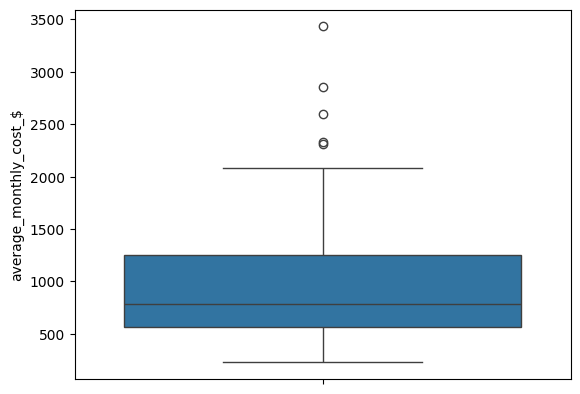

In [18]:
import seaborn as sns
sns.boxplot(merged_data["average_monthly_cost_$"])

#create a 